```
This software is a part of GPU Ocean.

Copyright (C) 2019  SINTEF Digital

This notebook is used to make figures that illustrates the double jet case used in the results section of the IEWPF paper.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Example of Double Jet Case

This notebook is used to make figures that illustrates the double jet case used in the results section of the IEWPF paper.

## Set environment

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc

import pycuda.driver as cuda
import os
import sys
import datetime
import subprocess


from importlib import reload
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))

#Set large figure sizes
rc('figure', figsize=(16.0, 12.0))
rc('animation', html='html5')

#Import our simulator
from SWESimulators import IPythonMagic, DoubleJetCase, CDKLM16

In [2]:
%cuda_context_handler gpu_ctx

In [3]:
#Create output directory for images
imgdir = 'double_jet'
filename_prefix = imgdir + "/" + datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S") + "_"
os.makedirs(imgdir, exist_ok=True)
print("Saving images to " + imgdir)

Saving images to double_jet


In [4]:
def imshow(im, interpolation="None", title=None, figsize=(4,4), interior=False):
    fig = plt.figure(figsize=figsize)
    
    if interior:
        im = plt.imshow(im[2:-2,2:-2], interpolation=interpolation, origin='lower')
    else:
        im = plt.imshow(im, interpolation=interpolation, origin='lower')
    
    plt.colorbar()
    if title is not None:
        plt.title(title)
        
def imshow3(eta, hu, hv, interpolation="None", title=None, figsize=(12,3), interior=False, infotext=None):

    fig = None
    axs = None
    if infotext is None:
        fig, axs = plt.subplots(1,3, figsize=figsize)
    else:
        fig, axs = plt.subplots(1,4, figsize=(figsize[0]*1.33, figsize[1]))
    
    range_eta = np.max(np.abs(eta))
    range_huv = max(np.max(np.abs(hu)), np.max(np.abs(hv)))
    
    if interior:
        eta_im = axs[0].imshow(eta[2:-2,2:-2], interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    else:
        eta_im = axs[0].imshow(eta, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[0].set_title("$\eta$")
    plt.colorbar(eta_im, ax=axs[0])
    
    if interior:
        hu_im = axs[1].imshow(hu[2:-2,2:-2], interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    else:
        hu_im = axs[1].imshow(hu, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[1].set_title("$hu$")
    plt.colorbar(hu_im, ax=axs[1])

    if interior:
        hv_im = axs[2].imshow(hv[2:-2,2:-2], interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    else:
        hv_im = axs[2].imshow(hv, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[2].set_title("$hv$")
    plt.colorbar(hv_im, ax=axs[2])

    if infotext is not None:
        axs[3].text(0.5, 0.5, infotext, ha='center')
                                
    if title is not None:
        if infotext is None:
            plt.suptitle(title)
        else: 
            plt.suptitle(title, x=3.0/8.0)
    plt.tight_layout()
    return fig
    
def imshow6(eta1, hu1, hv1, eta2, hu2, hv2, interpolation="None", title=None):
    fig, axs = plt.subplots(3,3, figsize=(12,13))
    
    range_eta = max(np.max(np.abs(eta1)), np.max(np.abs(eta2)))
    range_huv = max(np.max(np.abs(hu1)), np.max(np.abs(hu2)), np.max(np.abs(hv1)), np.max(np.abs(hv2)))
    
    eta_im = axs[0,0].imshow(eta1, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[0,0].set_title("eta 1")
    plt.colorbar(eta_im, ax=axs[0,0])
    
    hu_im = axs[0,1].imshow(hu1, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[0,1].set_title("hu 1")
    plt.colorbar(hu_im, ax=axs[0,1])

    hv_im = axs[0,2].imshow(hv1, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[0,2].set_title("hv 1")
    plt.colorbar(hv_im, ax=axs[0,2])

    
    eta_im2 = axs[1,0].imshow(eta2, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[1,0].set_title("eta 2")
    plt.colorbar(eta_im, ax=axs[1,0])
    
    hu_im2 = axs[1,1].imshow(hu2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[1,1].set_title("hu 2")
    plt.colorbar(hu_im, ax=axs[1,1])

    hv_im2 = axs[1,2].imshow(hv2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[1,2].set_title("hv 2")
    plt.colorbar(hv_im, ax=axs[1,2])
    
    
    eta_im3 = axs[2,0].imshow(eta1 - eta2, interpolation=interpolation, origin='lower', vmin=-range_eta, vmax=range_eta)
    axs[2,0].set_title("diff eta")
    plt.colorbar(eta_im, ax=axs[2,0])
    
    hu_im3 = axs[2,1].imshow(hu1 - hu2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[2,1].set_title("diff hu")
    plt.colorbar(hu_im, ax=axs[2,1])

    hv_im3 = axs[2,2].imshow(hv1 - hv2, interpolation=interpolation, origin='lower', vmin=-range_huv, vmax=range_huv)
    axs[2,2].set_title("diff hv")
    plt.colorbar(hv_im, ax=axs[2,2])

    if title is not None:
        plt.suptitle(title, fontsize=18)
    plt.tight_layout()   

# Creating a CDKLM simulator with the steady-state initial condition


In [5]:
save = True

300 300
(2220.0, 666000.0) (1110.0, 1110.0)


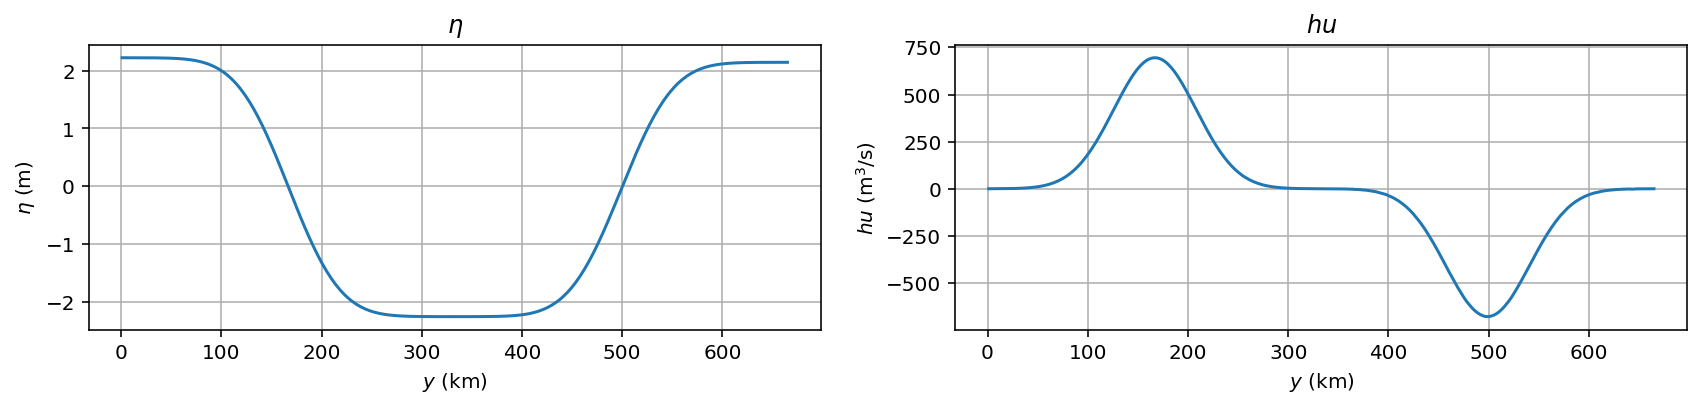

In [6]:
steadyStateCase = DoubleJetCase.DoubleJetCase(gpu_ctx, model_error=False)
steadyStateCase_args, steadyStateCase_init = steadyStateCase.getInitConditions()
steadyStateCase_sim = CDKLM16.CDKLM16(**steadyStateCase_args, **steadyStateCase_init)

eta, hu, hv = steadyStateCase_sim.download(interior_domain_only=True)

dy = steadyStateCase_sim.dy
ny = steadyStateCase_sim.ny
y = np.linspace(dy/2, dy*(ny-0.5), num=ny)
print(len(y), ny)
print((dy, ny*dy), (y[0], ny*dy - y[-1]))
y = y/1000

crossec_eta = eta[:, 20]
crossec_hu = hu[:, 20]



fig, axs = plt.subplots(1,2, figsize=(12,3))

eta_im = axs[0].plot(y, crossec_eta)
axs[0].grid()
axs[0].set_title('$\eta$')
axs[0].set_xlabel('$y$ (km)')
axs[0].set_ylabel('$\eta$ (m)')


hu_im = axs[1].plot(y, crossec_hu)
axs[1].grid()
axs[1].set_title('$hu$')
axs[1].set_xlabel('$y$ (km)')
axs[1].set_ylabel('$hu$ (m$^3$/s)')

plt.tight_layout()
if save: plt.savefig(filename_prefix + "initial_state.pdf", format='pdf')


# Instability after long time - need to consider what kind of perturbation we want to aim at...

tmp_sim has been spun up to 199999.99085903168
t: 199999.99085903168
In days: 2.3148147090165705 days
CPU times: user 12.6 s, sys: 2.79 s, total: 15.4 s
Wall time: 14.2 s


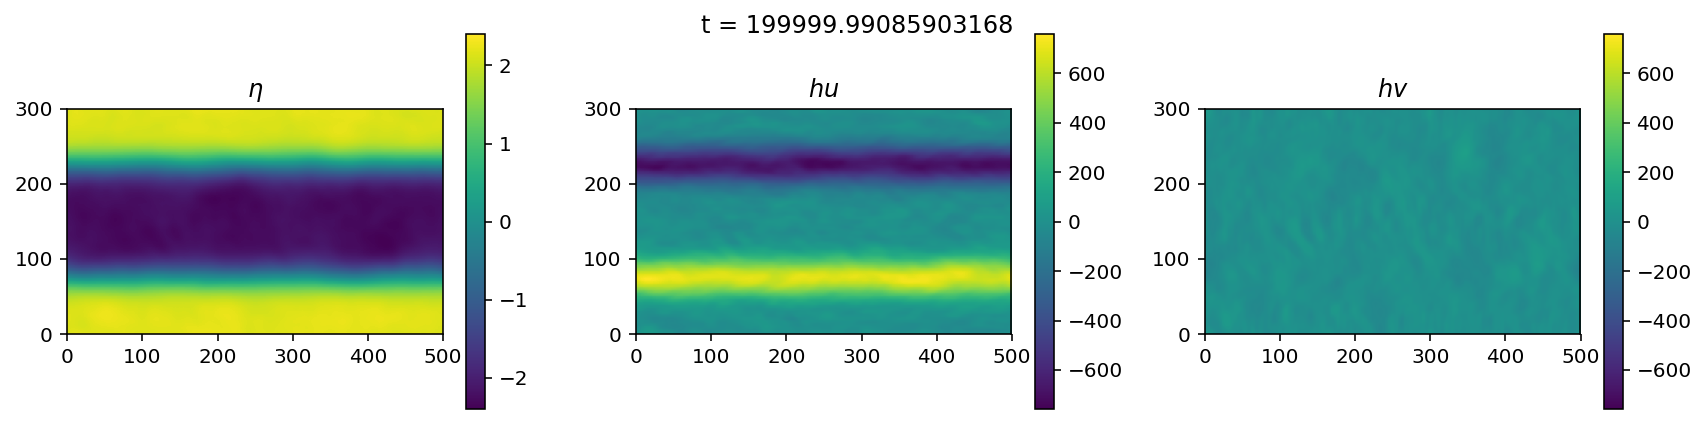

In [7]:
%%time
reload(DoubleJetCase)
paperCase = DoubleJetCase.DoubleJetCase(gpu_ctx, 
                                        DoubleJetCase.DoubleJetPerturbationType.LowFrequencySpinUp, 
                                        model_error=True)
paper_args, paper_init = paperCase.getInitConditions()

paper_sim = CDKLM16.CDKLM16(**paper_args, **paper_init)

eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(paper_sim.t))
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

t: 399999.98171806335
In days: 4.629629418033141 days
CPU times: user 9.42 s, sys: 2.03 s, total: 11.5 s
Wall time: 10.6 s


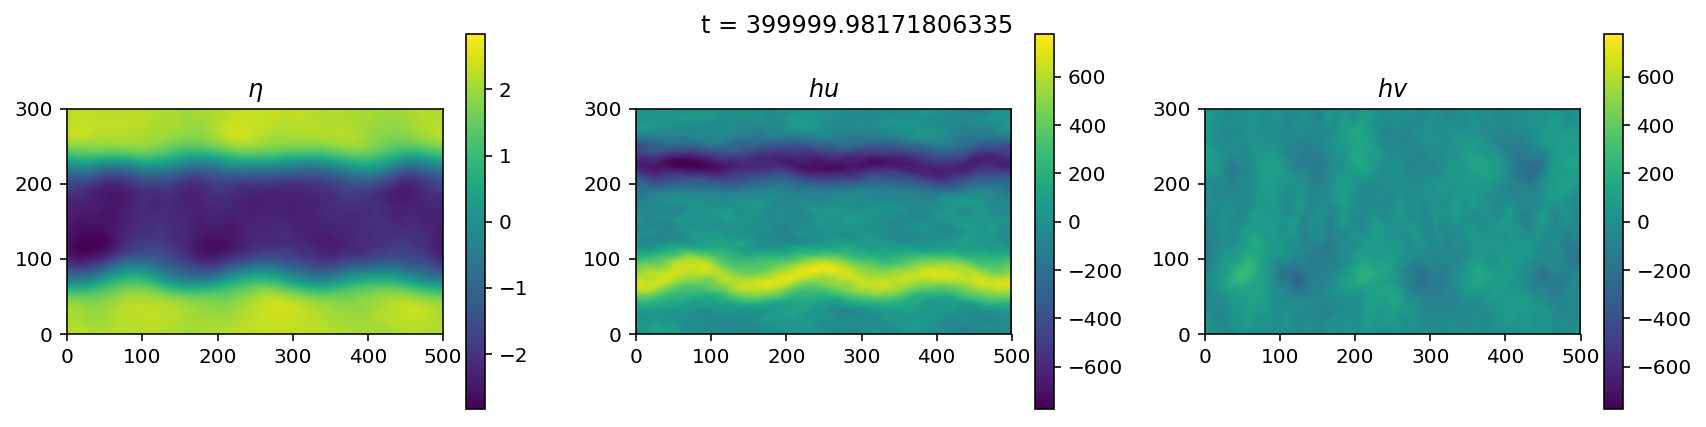

In [8]:
%%time
paper_sim.step(200000)
eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(paper_sim.t))
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

t: 599999.972577095
In days: 6.944444127049711 days
CPU times: user 9.36 s, sys: 2.18 s, total: 11.5 s
Wall time: 10.7 s


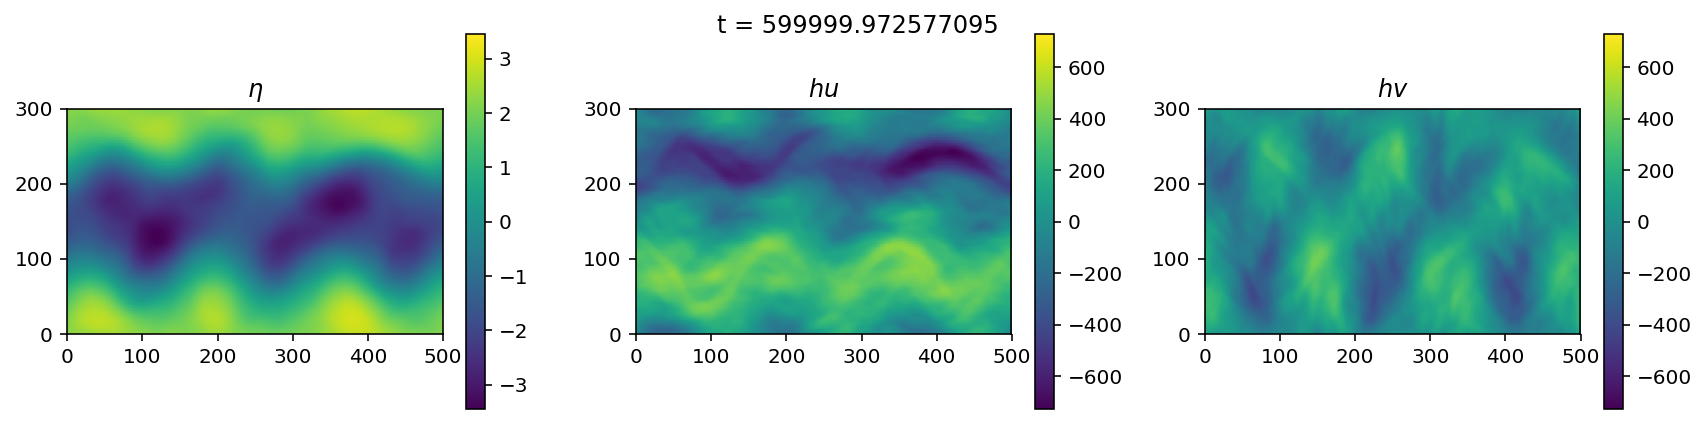

In [9]:
%%time
paper_sim.step(200000)
eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(paper_sim.t))
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

t: 799999.9634361267
In days: 9.259258836066282 days
CPU times: user 9.57 s, sys: 2.06 s, total: 11.6 s
Wall time: 10.7 s


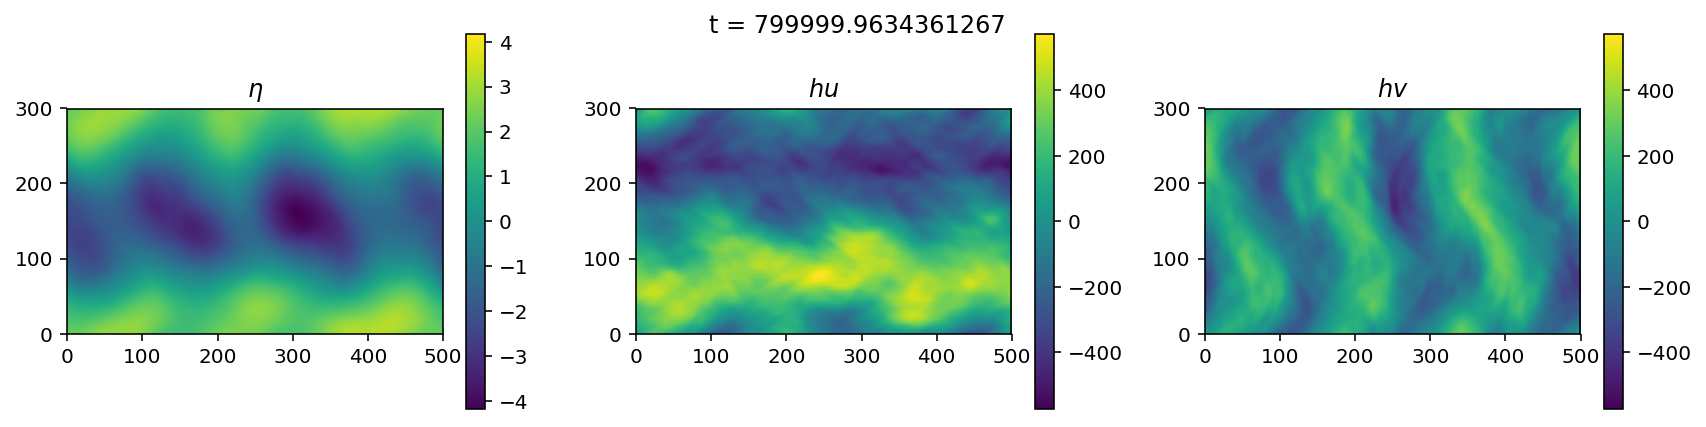

In [10]:
%%time
paper_sim.step(200000)
eta, hu, hv = paper_sim.download(interior_domain_only = True)
imshow3(eta, hu, hv, title='t = ' + str(paper_sim.t))
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")
if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')

t: 863999.9605112076
In days: 9.999999542953791 days
CPU times: user 3.98 s, sys: 1.3 s, total: 5.29 s
Wall time: 4.02 s


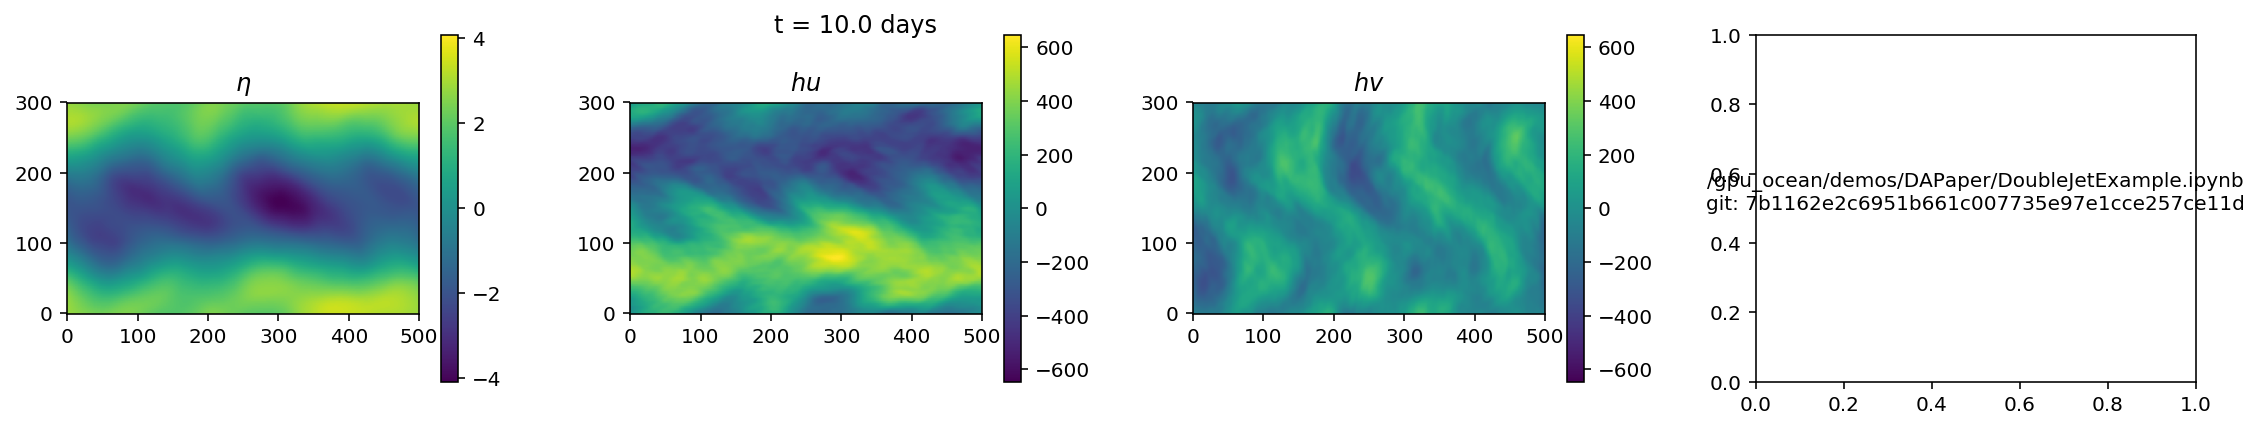

In [11]:
%%time
git_hash = str.strip(subprocess.check_output(['git', 'rev-parse', 'HEAD']).decode())
notebook="/gpu_ocean/demos/DAPaper/DoubleJetExample.ipynb"
infotext = notebook + "\ngit: " + git_hash

paper_sim.step(64000)
eta, hu, hv = paper_sim.download(interior_domain_only = True)
fig = imshow3(eta, hu, hv, 
        title='t = ' + str(round(paper_sim.t/(24*60*60))) + " days",
        infotext=infotext)
print("t:", paper_sim.t)
print("In days: " + str(paper_sim.t/(24*60*60)) + " days")

if save: plt.savefig(filename_prefix + "state_t_" + str(int(round(paper_sim.t))) + ".pdf", format='pdf')
    
